<a href="https://colab.research.google.com/github/bawantha/NN/blob/master/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
tf.__version__

'2.2.0'

In [ ]:
keras.__version__

'2.3.0-tf'

In [ ]:
fashion_mnist=keras.datasets.fashion_mnist

In [ ]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
y_train[0]

9

In [ ]:
#normilize data

In [ ]:
x_train_n=x_train/255.
x_test_n=x_test/255.

In [ ]:
x_valid,x_train=x_train_n[:5000],x_train_n[5000:]
y_valid,y_train=y_train[:5000],y_train[5000:]

In [ ]:
x_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(100,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
Total params: 275,700
Trainable params: 275,700
Non-trainable params: 0
_________________________________________________________________


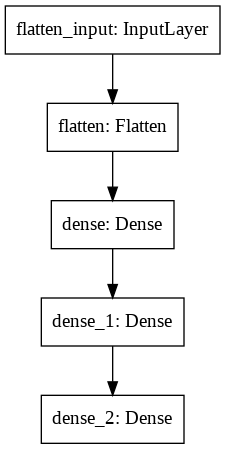

In [ ]:
import pydot
keras.utils.plot_model(model)

In [ ]:
weight,baise=model.layers[1].get_weights()

In [ ]:
weight

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [ ]:
weight.shape

(784, 300)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [ ]:
model_history=model.fit(x_train,y_train,epochs=30,validation_data=(x_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.8531 - accuracy: 0.7244 - val_loss: 0.5797 - val_accuracy: 0.8032
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5233 - accuracy: 0.8168 - val_loss: 0.4634 - val_accuracy: 0.8412
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4695 - accuracy: 0.8355 - val_loss: 0.6354 - val_accuracy: 0.7706
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4402 - accuracy: 0.8476 - val_loss: 0.4153 - val_accuracy: 0.8606
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4199 - accuracy: 0.8531 - val_loss: 0.3968 - val_accuracy: 0.8658
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4000 - accuracy: 0.8605 - val_loss: 0.3922 - val_accuracy: 0.8684
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3871 - accuracy: 0.8642 - val_loss: 0.3820 - val_accuracy:

In [ ]:
model_history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [ ]:
model_history.history

{'accuracy': [0.7243818044662476,
  0.8168363571166992,
  0.835454523563385,
  0.847636342048645,
  0.8530908823013306,
  0.8605272769927979,
  0.8642181754112244,
  0.867618203163147,
  0.873018205165863,
  0.874854564666748,
  0.8783272504806519,
  0.8805999755859375,
  0.8830363750457764,
  0.8855999708175659,
  0.8886545300483704,
  0.8905272483825684,
  0.8930181860923767,
  0.8942545652389526,
  0.8969272971153259,
  0.8978000283241272,
  0.8996182084083557,
  0.9020000100135803,
  0.9033636450767517,
  0.9044181704521179,
  0.9068182110786438,
  0.9091818332672119,
  0.9099818468093872,
  0.9111818075180054,
  0.9132182002067566,
  0.9150000214576721],
 'loss': [0.85306316614151,
  0.5232840180397034,
  0.46952593326568604,
  0.4401828348636627,
  0.4199288487434387,
  0.3999517858028412,
  0.38714107871055603,
  0.3744364380836487,
  0.3635626435279846,
  0.35331955552101135,
  0.3443448841571808,
  0.33448150753974915,
  0.3268941342830658,
  0.3205069601535797,
  0.3119095563

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 83.5240 - accuracy: 0.8244


[83.52404022216797, 0.824400007724762]

In [24]:
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()

In [26]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [27]:
housing.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [28]:
from sklearn.model_selection import train_test_split
x_train_full,x_test,y_train_full,y_test=train_test_split(housing.data,housing.target,random_state=42)
x_train,x_valid,y_train,y_valid=train_test_split(x_train_full,y_train_full)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_valid=scaler.transform(x_valid)
x_test=scaler.transform(x_test)

In [31]:
x_train.shape

(11610, 8)

In [33]:
model=keras.models.Sequential([
                             keras.layers.Dense(30, input_shape=[8],activation="relu"),
                             keras.layers.Dense(30,activation="relu"),
                             keras.layers.Dense(1),


])

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_4 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(loss="mean_squared_error",optimizer=keras.optimizers.SGD(learning_rate=1e-3),metrics=["mae"])

In [37]:
model_history=model.fit(x_train,y_train,epochs=30,validation_data=(x_valid,y_valid))

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 1.8542 - mae: 0.9889 - val_loss: 1.3779 - val_mae: 0.7073
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.7854 - mae: 0.6648 - val_loss: 0.6885 - val_mae: 0.6238
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6817 - mae: 0.6182 - val_loss: 0.6645 - val_mae: 0.5892
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6283 - mae: 0.5894 - val_loss: 0.5944 - val_mae: 0.5685
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5868 - mae: 0.5671 - val_loss: 0.5505 - val_mae: 0.5434
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5510 - mae: 0.5486 - val_loss: 0.5211 - val_mae: 0.5268
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5225 - mae: 0.5324 - val_loss: 0.5055 - val_mae: 0.5115
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [38]:
mae_test=model.evaluate(x_test,y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3754 - mae: 0.4393
